# Clustering methods

Clustergram offers three backends for the computation - `scikit-learn` and `scipy` which use CPU and RAPIDS.AI `cuML`, which uses GPU. Note that all are optional dependencies but you will need at least one of them to generate clustergram.

## Scikit-learn, SciPy and RAPIDS cuML backends

Let's load the data on Palmer penguins dataset. See the [Introduction](introduction) for its overview.

In [1]:
import seaborn
from sklearn.preprocessing import scale
from clustergram import Clustergram

df = seaborn.load_dataset('penguins')
data = scale(df.drop(columns=['species', 'island', 'sex']).dropna())

seaborn.set(style='whitegrid')

Using `scikit-learn` (default):

In [2]:
cgram = Clustergram(range(1, 8), n_init=10, backend="sklearn")
cgram.fit(data)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.030 seconds.
K=3 fitted in 0.007 seconds.
K=4 fitted in 0.006 seconds.
K=5 fitted in 0.008 seconds.
K=6 fitted in 0.008 seconds.
K=7 fitted in 0.008 seconds.


Clustergram(k_range=range(1, 8), backend='sklearn', method='kmeans', kwargs={'n_init': 10})

Using `cuML`:

In [3]:
cgram = Clustergram(range(1, 8), backend='cuML')
cgram.fit(data)

ImportError: cuML, cuDF and cupy packages are required to use `cuML` backend.

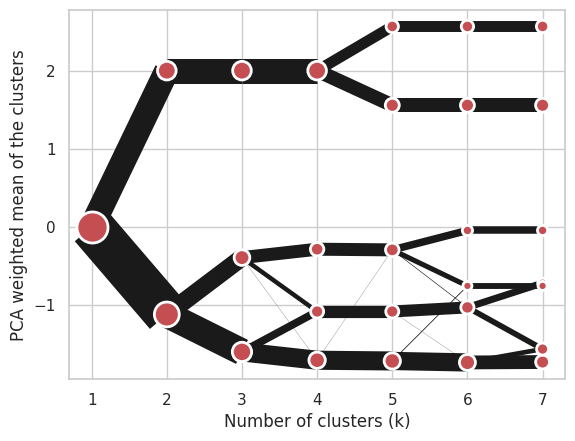

In [ ]:
cgram.plot();

`data` can be all data types supported by the selected backend (including `cudf.DataFrame` or `cupy.ndarray` with `cuML` backend).

## Supported methods

Clustergram currently supports K-Means, Mini Batch K-Means, Gaussian Mixture Model and SciPy's hierarchical clustering methods. Note tha GMM and Mini Batch K-Means are supported only for `scikit-learn` backend and hierarchical methods are supported only for `scipy` backend.

Using K-Means (default):

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.009 seconds.
K=3 fitted in 0.007 seconds.
K=4 fitted in 0.008 seconds.
K=5 fitted in 0.010 seconds.
K=6 fitted in 0.009 seconds.
K=7 fitted in 0.010 seconds.


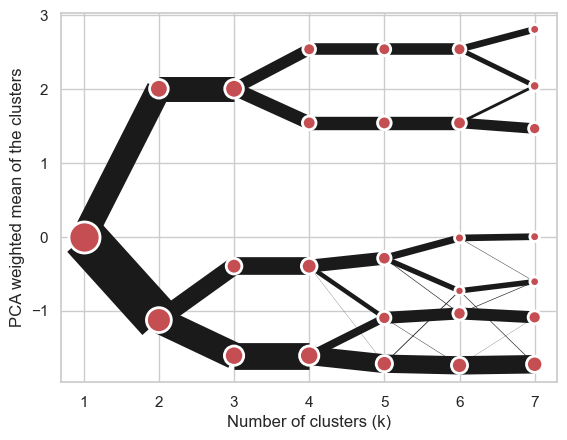

In [4]:
cgram = Clustergram(range(1, 8), n_init=10, method='kmeans')
cgram.fit(data)
cgram.plot();

Using Mini Batch K-Means, which can provide significant speedup over K-Means:

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.014 seconds.
K=3 fitted in 0.011 seconds.


K=4 fitted in 0.009 seconds.
K=5 fitted in 0.009 seconds.
K=6 fitted in 0.018 seconds.
K=7 fitted in 0.101 seconds.


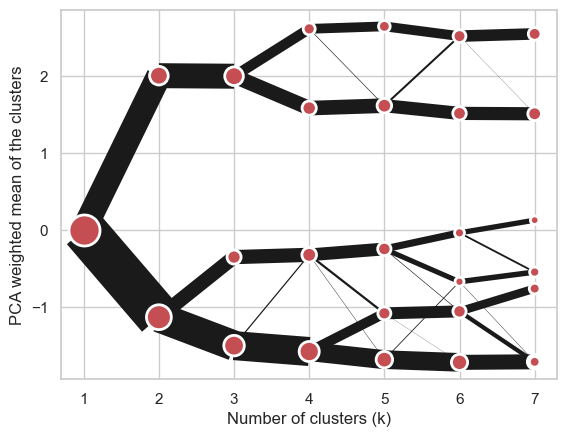

In [5]:
cgram = Clustergram(range(1, 8), n_init=10, method='minibatchkmeans', batch_size=100)
cgram.fit(data)
cgram.plot();

Using Gaussian Mixture Model:


K=1 fitted in 0.005 seconds.
K=2 fitted in 0.004 seconds.
K=3 fitted in 0.011 seconds.
K=4 fitted in 0.006 seconds.
K=5 fitted in 0.005 seconds.
K=6 fitted in 0.006 seconds.
K=7 fitted in 0.012 seconds.


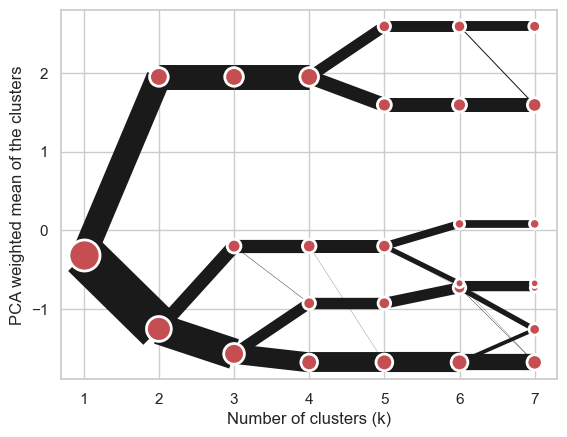

In [6]:
cgram = Clustergram(range(1, 8), method='gmm')
cgram.fit(data)
cgram.plot();

Using Ward's hierarchical clustering:

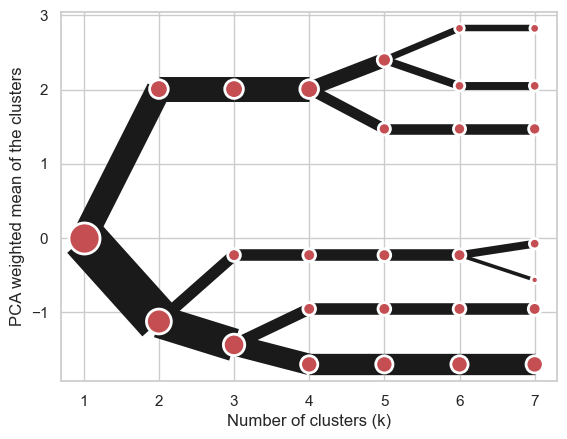

In [7]:
cgram = Clustergram(range(1, 8), method='hierarchical', linkage='ward')
cgram.fit(data)
cgram.plot();

## Manual input

Alternatively, you can create clustergram using `from_data` or  `from_centers` methods based on alternative clustering algorithms.

Using `Clustergram.from_data` which creates cluster centers as mean or median values:

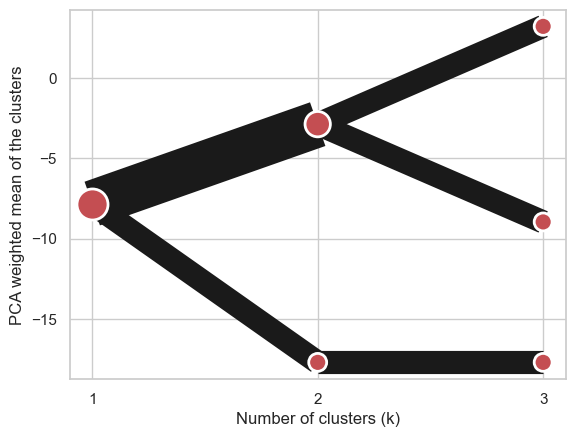

In [8]:
import numpy
import pandas

data = numpy.array([[-1, -1, 0, 10], [1, 1, 10, 2], [0, 0, 20, 4]])
labels = pandas.DataFrame({1: [0, 0, 0], 2: [0, 0, 1], 3: [0, 2, 1]})

cgram = Clustergram.from_data(data, labels)
cgram.plot();

Using `Clustergram.from_centers` based on explicit cluster centers.:

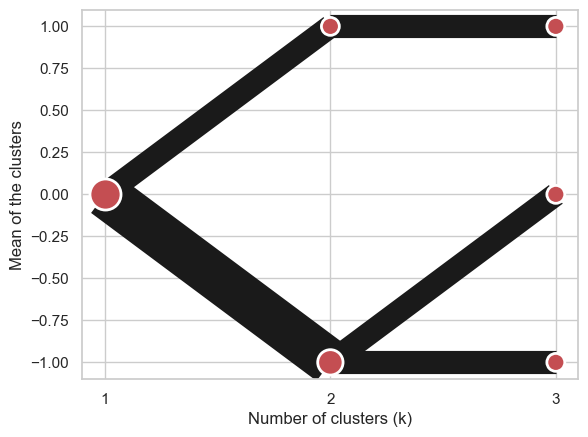

In [9]:
labels = pandas.DataFrame({1: [0, 0, 0], 2: [0, 0, 1], 3: [0, 2, 1]})
centers = {
            1: numpy.array([[0, 0, 0]]),
            2: numpy.array([[-1, -1, -1], [1, 1, 1]]),
            3: numpy.array([[-1, -1, -1], [1, 1, 1], [0, 0, 0]]),
        }
cgram = Clustergram.from_centers(centers, labels)
cgram.plot(pca_weighted=False);

To support PCA weighted plots with clustergram created from centers you also need to pass data:

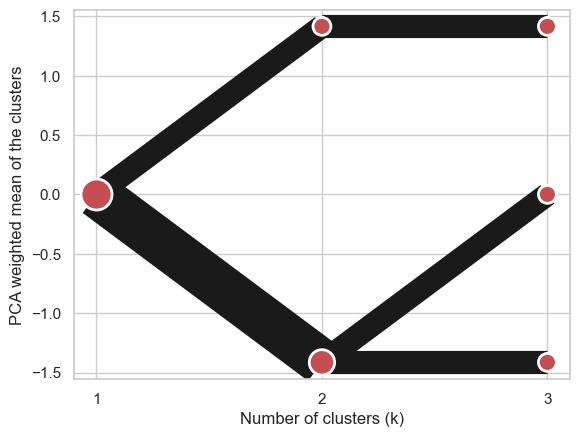

In [10]:
labels = pandas.DataFrame({1: [0, 0, 0], 2: [0, 0, 1], 3: [0, 2, 1]})
centers = {
    1: numpy.array([[0, 0]]),
    2: numpy.array([[-1, -1], [1, 1]]),
    3: numpy.array([[-1, -1], [1, 1], [0, 0]]),
}
data = numpy.array([[-1, -1], [1, 1], [0, 0]])
cgram = Clustergram.from_centers(centers, labels, data=data)
cgram.plot(pca_weighted=True);